# Computational Physics
## Curve Fitting via Least Squares Minimization

<img src="https://upload.wikimedia.org/wikipedia/commons/6/68/Overfitted_Data.png" width=600px>

In [1]:
import style
style._set_css_style('../include/bootstrap.css')

## Last Time
### [Notebook Link: 19_LinearRegression](./19_LinearRegression.ipynb)

- Definition of fitting residuals and $\chi^2$
- Derived optimal values for linear regression


## Today

- Making things look linear
- Non-linear regression
- Goodness of fit

## Setting up the Notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('../include/notebook.mplstyle');
%config InlineBackend.figure_format = 'svg'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Mapping non-linear problems onto linear ones 

Last time we derived the formulae for $a_0$ and $a_1$ corresponding to a linear fitting function:

\begin{equation}
Y(x;\vec{a}) = a_0 + a_1 x .
\end{equation}

While today we will learn how to perform fits to general functions, there are many seemingly non-linear cases that can be mapped to linear ones with an appropriate choice of variables.

### 1. Exponentials: $Y(x;\vec{a}) = a_0 \mathrm{e}^{a_1 x}$

Define: 
\begin{equation}
\tilde{Y}(x;\vec{\tilde{a}}) = \ln Y
\end{equation}
we can write:
\begin{equation}
\tilde{Y}(x;\vec{\tilde{a}}) = \tilde{a}_0 + \tilde{a}_1 x
\end{equation}
where
\begin{align}
\tilde{a}_0 &= \ln a_0 \newline
\tilde{a}_1 &= a_1.
\end{align}

### 2. Powerlaws: $Y(x;\vec{a}) = a_0 x^{a_1}$

Define:
\begin{equation}
\tilde{Y}(x;\vec{\tilde{a}}) = \ln Y
\end{equation}
we can write:
\begin{equation}
\tilde{Y}(\tilde{x};\vec{\tilde{a}}) = \tilde{a}_0 + \tilde{a}_1 \tilde{x}
\end{equation}
where
\begin{align}
\tilde{x} &= \ln x \newline
\tilde{a}_0 &= \ln a_0 \newline
\tilde{a}_1 &= a_1.
\end{align}

<br />
<div class="span alert-danger">
Note that in both cases, we may have to shift our data to make it go through the origin.
</div>

## Example:

<!--
np.array([[cx,2.4*np.exp(-1.7*cx) + np.random.normal(0,0.005/cx),0.2*cx**1.2 + np.random.normal(0,0.05)] for cx in np.linspace(0.1,5,20)])
-->

In [3]:
# We defined these functions last time
def Σ(σ,q):
    '''Compute the Σ function needed for linear fits.'''
    return np.sum(q/σ**2)

def get_a(x,y,σ):
    '''Get the χ^2 best fit value of a0 and a1.'''

    # Get the individual Σ values
    Σy,Σx,Σx2,Σ1,Σxy = Σ(σ,y),Σ(σ,x),Σ(σ,x**2),Σ(σ,np.ones(x.size)),Σ(σ,x*y)

    # the denominator
    D = Σ1*Σx2 - Σx**2

    # compute the best fit coefficients
    a = np.array([Σy*Σx2 - Σx*Σxy,Σ1*Σxy - Σx*Σy])/D

    # Compute the error in a
    aErr = np.array([np.sqrt(Σx2/D),np.sqrt(Σ1/D)])

    return a,aErr

def linear(x,a):
    '''Return a polynomial of order'''
    return a[0] + a[1]*x

data = np.array([[  1.00000000e-01,   2.04138220e+00,   9.73629324e-03],
       [  3.57894737e-01,   1.30119078e+00,   1.12856801e-01],
       [  6.15789474e-01,   8.42154689e-01,   9.83121201e-02],
       [  8.73684211e-01,   5.45192601e-01,   1.29185248e-01],
       [  1.13157895e+00,   3.59854509e-01,   2.15797712e-01],
       [  1.38947368e+00,   2.23469107e-01,   2.81326486e-01],
       [  1.64736842e+00,   1.47065865e-01,   3.29001539e-01],
       [  1.90526316e+00,   9.42222066e-02,   4.24678699e-01],
       [  2.16315789e+00,   6.29051329e-02,   4.21412036e-01],
       [  2.42105263e+00,   3.49731098e-02,   6.30215689e-01],
       [  2.67894737e+00,   2.37533207e-02,   5.75886026e-01],
       [  2.93684211e+00,   1.54965698e-02,   7.41655404e-01],
       [  3.19473684e+00,   9.73289991e-03,   8.07876091e-01],
       [  3.45263158e+00,   8.36780173e-03,   8.86926901e-01],
       [  3.71052632e+00,   3.90242054e-03,   9.43666008e-01],
       [  3.96842105e+00,   1.61554262e-03,   1.13278970e+00],
       [  4.22631579e+00,   2.59857424e-03,   1.14161518e+00],
       [  4.48421053e+00,   1.73614348e-03,   1.23615458e+00],
       [  4.74210526e+00,   1.63584150e-03,   1.25628767e+00],
       [  5.00000000e+00,   1.59297834e-03,   1.27049395e+00]])

Text(0, 0.5, 'y')

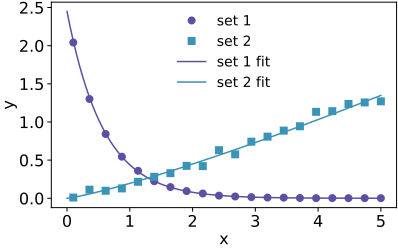

In [4]:
# get the data
x,y1,y2,σ = data[:,0],data[:,1],data[:,2],np.ones_like(data[:,0])

# plot the data
plt.plot(x,y1,'o',mfc=colors[0], mec='None',label='set 1')
plt.plot(x,y2,'s',mfc=colors[1], mec='None', label='set 2')

# peform the fits
a1,a1_err = get_a(x[:-10],np.log(y1[:-10]),σ[:-10])
a2,a2_err = get_a(np.log(x),np.log(y2),σ)

# plot the fit results
fx = np.linspace(0,5,100)
plt.plot(fx,np.exp(a1[0])*np.exp(a1[1]*fx), color=colors[0], linewidth=1.5, zorder=0, label='set 1 fit')
plt.plot(fx,np.exp(a2[0])*fx**a2[1], color=colors[1],linewidth=1.5, zorder=0, label='set 2 fit')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')

<div class="span alert-danger">
You need to be careful with the correct propagation of errors in your fitting parameteters when doing this!
</div>

## General Least Squares Fitting

We can easily generalize our fitting procedure to functions of the form:

\begin{equation}
Y(x;\vec{a}) = \sum_{\alpha=0}^{M-1} a_\alpha Y_\alpha(x)
\end{equation}
where $Y_\alpha(x) : \mathbb{R} \to \mathbb{R}$.  As before, we minimize $\chi^2$ with respect to $a_\alpha$:

\begin{align}
\frac{\partial \chi^2}{\partial a_\alpha} &= \frac{\partial}{\partial a_\alpha} \sum_i \frac{1}{\sigma_i^2}\left[\sum_{\beta=0}^{M-1}a_\beta Y_\beta(x_i)  y_i\right]^2 = 0\newline
&= \sum_i \frac{Y_\alpha(x_i)}{\sigma_i^2}\left[\sum_{\beta=0}^{M-1}a_\beta Y_\beta(x_i)  y_i\right] = 0\newline
\end{align}
which gives:
\begin{equation}
\sum_i \sum_\beta \frac{Y_\alpha(x_i)Y_\beta(x_i)}{\sigma_i^2} a_\beta = \sum_i \frac{Y_\alpha(x_i)y_i}{\sigma_i^2} .
\end{equation}

At this point it is useful to define the **design matrix**   $\mathsf{A}$ which is independenct of $y_i$ and only depends on where the data is measured:
\begin{equation}
\mathsf{A}_{i\alpha} \equiv \frac{Y_\alpha(x_i)}{\sigma_i}.
\end{equation}

We can re-write our optimization equation as:
\begin{equation}
\sum_i \sum_\beta \mathsf{A}_{i\alpha}\mathsf{A}_{i\beta} a_\beta = \sum_i \mathsf{A}_{i\alpha}\frac{y_i}{\sigma_i}
\end{equation}
which is much simpler using matrix multiplication:
\begin{equation}
\left(\mathsf{A}^\intercal \mathsf{A}\right) \vec{a} = \mathsf{A}^\intercal \vec{b}
\end{equation}
where $b_i \equiv y_i/\sigma_i$. This equation can be easily solved:

\begin{equation}
\vec{a} =\left(\mathsf{A}^\intercal \mathsf{A}\right)^{-1} \mathsf{A}^\intercal \vec{b}
\end{equation}
where the uncertainty in the fitting parameters are given by the covariance matrix:
\begin{align}
\sigma_{a_{\alpha}} &= \sqrt{\mathsf{C}_{\alpha\alpha}} \newline
\mathsf{C} &= \left(\mathsf{A}^\intercal \mathsf{A}\right)^{-1} .
\end{align}

This is how *all* black-box least squares fitting functions work.  We will use `curve_fit` from `scipy.optimize`: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

Text(0, 0.5, 'y')

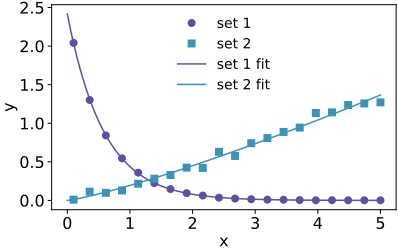

In [5]:
from scipy.optimize import curve_fit

def exp_func(x,*a):
    '''exponential function'''
    return a[0]*np.exp(a[1]*x)

def power_func(x,*a):
    '''power function.'''
    return a[0]*x**a[1]

# perform the fits
a1,a1_cov = curve_fit(exp_func,x,y1,p0=(1,1))
a2,a2_cov = curve_fit(power_func,x,y2,p0=(1,1))

# plot the data
plt.plot(x,y1,'o',mfc=colors[0], mec='None',label='set 1')
plt.plot(x,y2,'s',mfc=colors[1], mec='None', label='set 2')

# plot the fit results
fx = np.linspace(0,5,100)
plt.plot(fx,exp_func(fx,*a1), color=colors[0], linewidth=1.5, zorder=0, label = 'set 1 fit')
plt.plot(fx,power_func(fx,*a2), color=colors[1],linewidth=1.5, zorder=0, label='set 2 fit')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')


## More interesting data: thermal conductivity of copper

We know that heat conduction in metals is due to (1) electronic and (2) phononic contributions. These can be distinguished by their temperature dependence and the thermal conductivity is given by:

\begin{equation}
\kappa(T) = \frac{1}{a_0/T + a_1 T^2} .
\end{equation}

<div class="span alert alert-success">
<h2> Programming challenge </h2>
    Load the experimental data for the thermal conductivity of copper  <kbd>../data/kappa.dat</kbd>. Perform a non-linear fit to the data and extract the two parameters with error bars.  How good is your fit?
</div>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


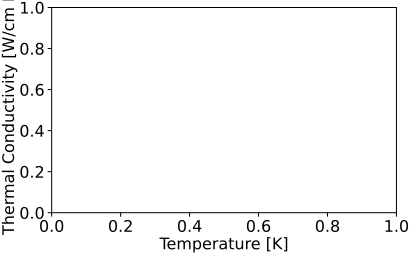

In [6]:
def κ_theory(T,*a):
    '''Model for thermal conductivity'''
    pass
    return 0.0

# Load the data and perform the fit
pass

# plot the original data
pass

# plot the line of best fit
fit_T = np.linspace(0.1,60,1000)
pass

# add axis labels and legend
pass
plt.xlabel('Temperature [K]')
plt.ylabel('Thermal Conductivity [W/cm K]')
plt.legend()

# fit values
pass

### How good is this fit?  
We can calculate the value of $\chi^2$:

\begin{equation}
\chi^2 = \sum_i \frac{1}{\sigma_i^2} \left[Y(x_i;\vec{a})-y_i \right]^2
\end{equation}

and we expect that a *good fit* should reflect the fact that the distance between the curve and data points should be on the order of the errorbars:

\begin{equation}
\sigma_i \approx |Y(x_i;\vec{a})-y_i|
\end{equation}

thus we find:

\begin{equation}
\chi^2 \approx N.
\end{equation}

In [7]:
def χ2(x,y,Y,σ=None):
    '''Return the value of χ².'''
    if σ.any():
        return np.sum(((Y-y)/σ)**2)
    else: 
        return np.sum((Y-y)**2)
   
print(f'κ-fit: χ² = {χ2(T,κ,κ_theory(T,*a),σ):5.3E}')
print(T.size)

NameError: name 'T' is not defined

The *bare* value of $\chi^2$ can be a bit misleading, as we know that the more parameters we use in the fit, the better the fit will be.  The fit will be **perfect** when $N=M$:

In [8]:
def poly_fit(x,*par):
    '''A par.size-1 order polynomial'''
    poly = np.poly1d(par)
    return poly(x)

# perform a pathalogical fit to the data
M = 7
ap,ap_cov = curve_fit(poly_fit,T,κ,p0=np.ones(M))

# plot the original data
plt.errorbar(T,κ,yerr=σ, marker='o', mfc=colors[2], mec='w', markersize=8, 
             linestyle='none', capsize=0, elinewidth=1.5, ecolor=colors[2], label='Cu Data')

# plot the fits
fit_T = np.linspace(0.1,60,1000)
plt.plot(fit_T, κ_theory(fit_T,*a), '-', color=colors[2], linewidth=2, 
         zorder=0, label=r'$(a_0/T + a_1 T\ {}^2)^{-1}$')
plt.plot(fit_T, poly_fit(fit_T,*ap), '--', color=colors[2], linewidth=2, 
         zorder=0, label='Order-%d polynomial'%(M-1))

# add axis labels and legend
plt.xlabel('Temperature [K]')
plt.ylabel('Thermal Conductivity [W/cm K]')
plt.legend()

NameError: name 'T' is not defined

Thus it is meaninful to consider the value of $\chi^2$ per *degree of freedom* (DOF), i.e.:

\begin{equation}
\frac{\chi^2}{N-M}
\end{equation}

We say that a good fit has $\chi^2/{\rm DOF} \sim 1$. If:
1. $\chi^2/DOF \gg 1$: not using an appropriate model to fit, or the error bars are too large. 
2. $\chi^2/DOF \ll 1$: overfitting, error bars may be too small.

A great resource for learning more about curve fitting is: [Peter Young, *Everything you wanted to know about Data Analysis and Fitting but were afraid to ask*](https://arxiv.org/abs/1210.3781).


In [ ]:
print(f'κ-fit      : χ² = {χ2(T,κ,κ_theory(T,*a),σ)/(T.size-2):G}') 
print(f'{M-1}-poly-fit : χ² = {χ2(T,κ,poly_fit(T,*ap),σ)/(T.size-M):G}')

## For Experts

The **goodness of fit** parameter, $Q$, measures the probability that this value of $\chi^2$, or greater, could occur by chance, assuming that the data points are normally distributed.

\begin{equation}
Q = \frac{1}{\Gamma(N_{DOF}/2)} \int_{\chi^2/2}^{\infty} dy y^{N_{DOF}/2-1} \mathrm{e}^{-y} .
\end{equation}

In [ ]:
from scipy.special import gammaincc
print(f'κ-fit      : Q = {gammaincc(0.5*(T.size-2), 0.5*χ2(T,κ,κ_theory(T,*a),σ)):5.3f}')
print(f'{M-1}-poly-fit : Q = {gammaincc(0.5*(T.size-M), 0.5*χ2(T,κ,poly_fit(T,*ap),σ)):5.3f}')